In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('fcc-forum-pageviews.csv',index_col='date',parse_dates=['date'])

In [3]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df=df.loc[(df.value>df.value.quantile(0.025))
         & (df.value<df.value.quantile(0.975))]

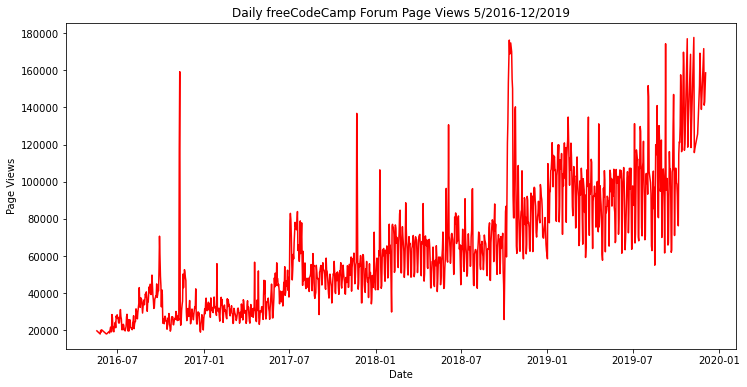

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.index,df.value,color='red')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

In [6]:
df['month']=df.index.month
df['year']=df.index.year

In [7]:
df.head()

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016


In [8]:
 df_bar=df.groupby(['month','year']).value.mean()

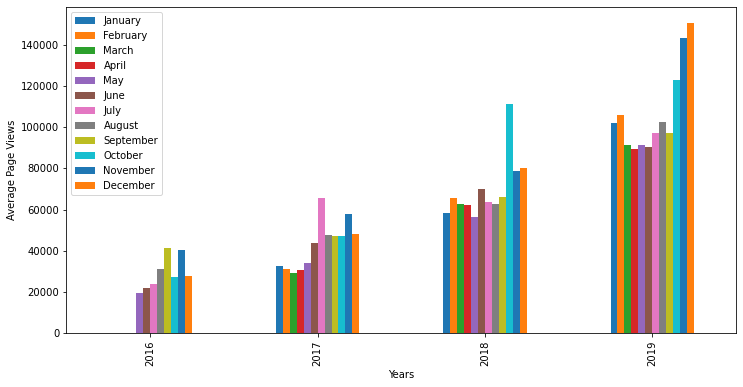

In [9]:
fig = df_bar.unstack(0).plot.bar(figsize=(12,6))
fig.set_xlabel('Years')
fig.set_ylabel('Average Page Views')
months=["January","February","March","April","May","June","July","August","September","October","November","December"]
plt.legend(fontsize = 10, labels = months)
plt.show()

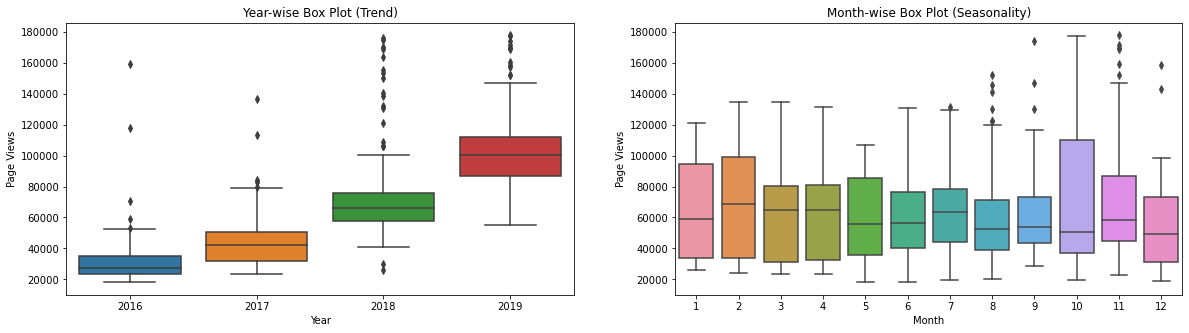

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)

sns.boxplot(x="month", y="value", data=df)
plt.xlabel('Month')
plt.ylabel('Page Views')
plt.title("Month-wise Box Plot (Seasonality)")

plt.subplot(1,2,1)
sns.boxplot(x="year", y="value", data=df)
plt.xlabel('Year')
plt.ylabel('Page Views')
plt.title("Year-wise Box Plot (Trend)")

plt.show()